---
title: Measuring information in DNA sequence
date: 2025-04-03
author: Haky Im
eval: false
---

## Understanding Entropy and Information Content in DNA Sequence Analysis

In the analysis of DNA sequences, particularly when studying motifs and patterns, two key concepts from information theory are entropy and information content. These measures help quantify the variability and conservation of nucleotides at specific positions within a set of aligned sequences.

1. Entropy (H):

Entropy measures the uncertainty or randomness at a given position. For DNA with four possible bases (A, C, G, T) and their respective probabilities at a position being p(A), p(C), p(G), and p(T) (where p(A) + p(C) + p(G) + p(T) = 1), the Shannon entropy (H) in bits is calculated using the following formula:

H = - (p(A) * log2(p(A)) + p(C) * log2(p(C)) + p(G) * log2(p(G)) + p(T) * log2(p(T)))
A higher entropy value indicates greater uncertainty or variability in the nucleotides at that position.
A lower entropy value indicates less uncertainty, meaning one or a few nucleotides are more dominant.
The maximum possible entropy for DNA (when all four bases are equally likely) is 2 bits.
The minimum possible entropy (when only one base is present) is 0 bits.
2. Information Content (IC):

Information content measures the amount of information gained by knowing the nucleotide at a particular position. It reflects the conservation of that position relative to a background distribution (often assumed to be uniform). The information content (IC) in bits is calculated as:

IC = log2(N) - H
Where:

N is the number of possible nucleotides (4 for DNA).

log2(N) represents the maximum possible information content (2 bits for DNA).

H is the Shannon entropy calculated for that position.

A higher information content value indicates greater conservation and importance of specific nucleotides at that position.

A lower information content value indicates less conservation and more variability.

The maximum possible information content for DNA is 2 bits (when entropy is 0).

The minimum possible information content (when entropy is maximum) is 0 bits.

In [1]:
import math

def calculate_entropy(pA, pC, pG, pT):
    """
    Calculates the Shannon entropy for DNA bases given their probabilities.

    Args:
        pA (float): Probability of Adenine (A).
        pC (float): Probability of Cytosine (C).
        pG (float): Probability of Guanine (G).
        pT (float): Probability of Thymine (T).

    Returns:
        float: The Shannon entropy in bits.
    """
    entropy = 0
    if pA > 0:
        entropy -= pA * math.log2(pA)
    if pC > 0:
        entropy -= pC * math.log2(pC)
    if pG > 0:
        entropy -= pG * math.log2(pG)
    if pT > 0:
        entropy -= pT * math.log2(pT)
    return entropy

def calculate_information_content(pA, pC, pG, pT):
    """
    Calculates the information content (in bits) at a given position
    based on the nucleotide probabilities.

    Args:
        pA (float): Probability of Adenine (A).
        pC (float): Probability of Cytosine (C).
        pG (float): Probability of Guanine (G).
        pT (float): Probability of Thymine (T).

    Returns:
        float: The information content in bits.
    """
    num_nucleotides = 4  # A, C, G, T
    max_entropy = math.log2(num_nucleotides)  # Maximum entropy for 4 equally likely bases
    entropy = calculate_entropy(pA, pC, pG, pT)
    information_content = max_entropy - entropy
    return information_content

# Example Usage:
probability_A = 0.3
probability_C = 0.2
probability_G = 0.25
probability_T = 0.25

entropy_value = calculate_entropy(probability_A, probability_C, probability_G, probability_T)
information_content_value = calculate_information_content(probability_A, probability_C, probability_G, probability_T)

print(f"Probabilities: p(A)={probability_A:.2f}, p(C)={probability_C:.2f}, p(G)={probability_G:.2f}, p(T)={probability_T:.2f}")
print(f"Entropy: {entropy_value:.4f} bits")
print(f"Information Content: {information_content_value:.4f} bits")

# Example with uniform distribution:
entropy_uniform = calculate_entropy(0.25, 0.25, 0.25, 0.25)
information_content_uniform = calculate_information_content(0.25, 0.25, 0.25, 0.25)
print(f"\nProbabilities (uniform): p(A)=0.25, p(C)=0.25, p(G)=0.25, p(T)=0.25")
print(f"Entropy (uniform): {entropy_uniform:.4f} bits")
print(f"Information Content (uniform): {information_content_uniform:.4f} bits")

# Example with a fully conserved position:
entropy_conserved = calculate_entropy(1.0, 0.0, 0.0, 0.0)
information_content_conserved = calculate_information_content(1.0, 0.0, 0.0, 0.0)
print(f"\nProbabilities (fully conserved): p(A)=1.00, p(C)=0.00, p(G)=0.00, p(T)=0.00")
print(f"Entropy (fully conserved): {entropy_conserved:.4f} bits")
print(f"Information Content (fully conserved): {information_content_conserved:.4f} bits")

Probabilities: p(A)=0.30, p(C)=0.20, p(G)=0.25, p(T)=0.25
Entropy: 1.9855 bits
Information Content: 0.0145 bits

Probabilities (uniform): p(A)=0.25, p(C)=0.25, p(G)=0.25, p(T)=0.25
Entropy (uniform): 2.0000 bits
Information Content (uniform): 0.0000 bits

Probabilities (fully conserved): p(A)=1.00, p(C)=0.00, p(G)=0.00, p(T)=0.00
Entropy (fully conserved): 0.0000 bits
Information Content (fully conserved): 2.0000 bits


## compute PWM from convolutional layer

Logic:

calculate_pwm_from_filter_weights(conv_layer):

Takes a PyTorch nn.Conv1d layer as input.
Extracts the weight data from the convolutional layer using conv_layer.weight.data.cpu().numpy(). The shape of these weights is typically (out_channels, in_channels, kernel_size).
Checks if the in_channels is 4, as expected for one-hot encoded DNA.
Iterates through each filter (out_channels).
For each filter, it extracts the corresponding weight matrix, which will have a shape of (4, kernel_size).
The raw weights themselves can be considered a form of a PWM where the values indicate the filter's preference. These are stored in the pwms dictionary.
Note: You might want to apply further transformations here, such as taking the absolute value, using a ReLU-like function (np.maximum(0, pwm)), or normalizing the weights. The example includes a separate function for normalization.
visualize_pwm_from_weights(pwm_dict, num_cols=8):

Takes the dictionary of PWMs (NumPy arrays) and the desired number of columns for the plot.
Creates a grid of subplots using Matplotlib.
For each PWM in the dictionary:
Creates a Pandas DataFrame with nucleotides as columns.
Uses the logomaker.Logo function to generate a sequence logo from the PWM.
Sets the title and y-axis label.
Normalization (Optional but Recommended for Probabilistic Interpretation):

The normalize_pwm(pwm) function demonstrates how to normalize the weights for each position using the softmax function. This transforms the weights into values that resemble probabilities (summing to 1 across the four nucleotides for each position).
A separate visualization function visualize_normalized_pwm_from_weights is provided to display these normalized PWMs with a y-axis ranging from 0 to 1.
How to Use:

Make sure you have PyTorch, NumPy, Pandas, Logomaker, and Matplotlib installed.
Define or load your convolutional neural network model.
Get the first convolutional layer from your model (e.g., first_conv_layer = model.conv1).
Call calculate_pwm_from_filter_weights(first_conv_layer) to get the PWMs from the weights.
Call visualize_pwm_from_weights() or visualize_normalized_pwm_from_weights() to visualize the resulting PWMs as sequence logos.
This approach provides a direct visualization of the patterns that the convolutional filters have learned based on their weight values. Remember that the interpretation of these PWMs might differ slightly from those derived from activation-maximizing sequences.


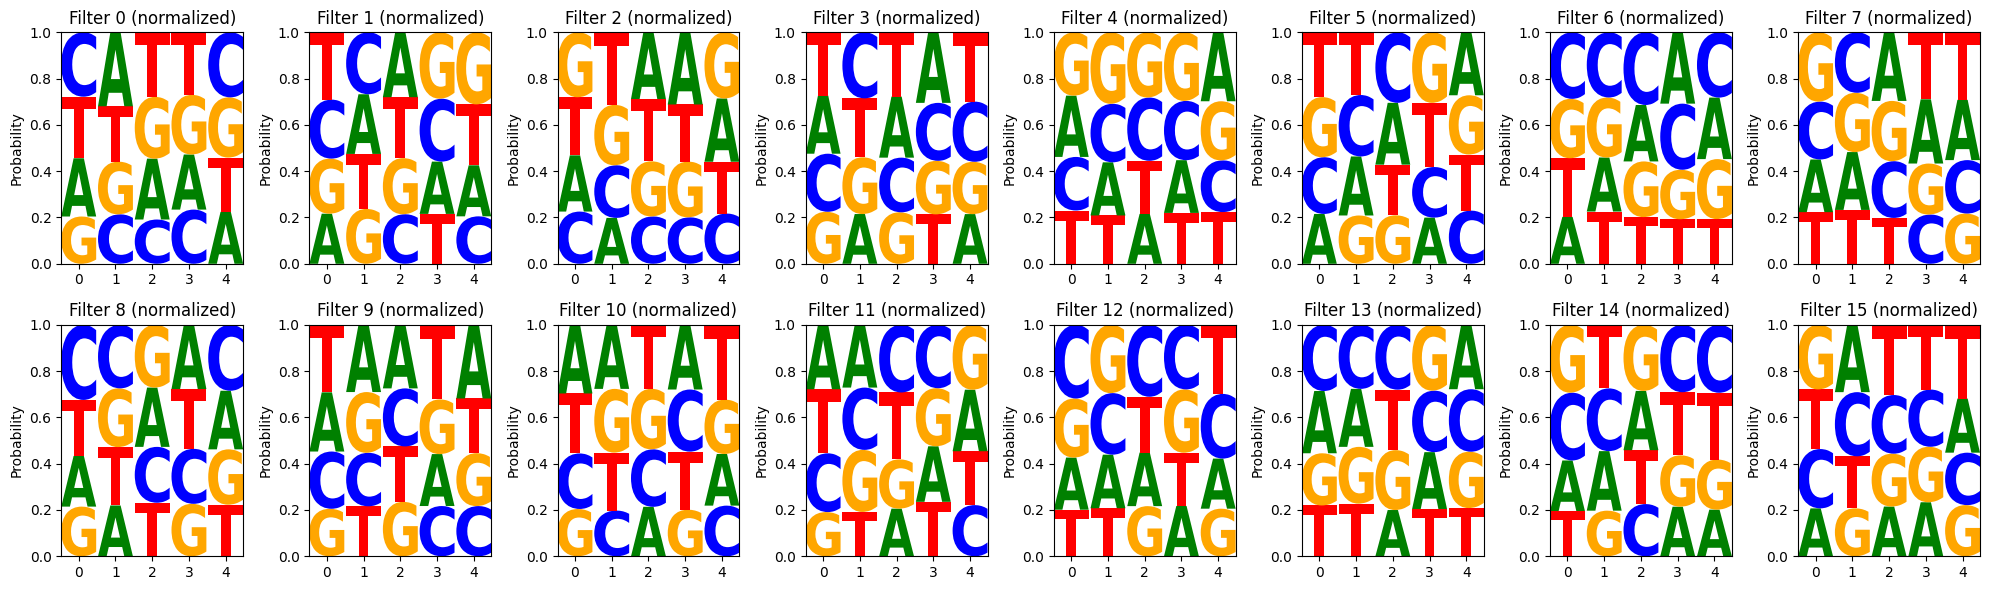

In [3]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import logomaker
import matplotlib.pyplot as plt

def calculate_pwm_from_filter_weights(conv_layer):
    """
    Calculates a Position Weight Matrix (PWM) for each filter in a
    convolutional layer directly from its weights, applying softmax.

    Args:
        conv_layer (nn.Conv1d): A 1D convolutional layer.

    Returns:
        dict: A dictionary where keys are filter indices and values are
              NumPy arrays representing the normalized PWM (shape: 4 x kernel_size).
    """
    pwms = {}
    weights = conv_layer.weight.data.cpu().numpy()  # Get the filter weights

    num_filters = weights.shape[0]
    in_channels = weights.shape[1]
    kernel_size = weights.shape[2]

    if in_channels != 4:
        raise ValueError("Input channels of the convolutional layer should be 4 for DNA (A, C, G, T).")

    for i in range(num_filters):
        filter_weights = weights[i]  # Shape: (4, kernel_size)
        # Apply softmax along the nucleotide dimension (axis=0)
        exponentiated = np.exp(filter_weights - np.max(filter_weights, axis=0, keepdims=True)) # Subtract max for numerical stability
        normalized_pwm = exponentiated / np.sum(exponentiated, axis=0, keepdims=True)
        pwms[i] = normalized_pwm

    return pwms

def visualize_pwm_from_weights(pwm_dict, num_cols=8):
    """
    Visualizes the PWMs derived from filter weights as sequence logos.

    Args:
        pwm_dict (dict): A dictionary of PWMs (as NumPy arrays).
        num_cols (int): Number of columns in the visualization grid.
    """
    num_filters = len(pwm_dict)
    if num_filters == 0:
        print("No PWMs to visualize.")
        return

    num_rows = int(np.ceil(num_filters / num_cols))
    plt.figure(figsize=(20, 3 * num_rows))

    for i, (filter_index, pwm) in enumerate(pwm_dict.items()):
        ax = plt.subplot(num_rows, num_cols, i + 1)
        df = pd.DataFrame(pwm.T, columns=['A', 'C', 'G', 'T']) # Transpose for logomaker
        logo = logomaker.Logo(df, ax=ax)
        ax.set_title(f"Filter {filter_index} (normalized)")
        ax.set_ylabel("Probability")
        logo.style_xticks() # Removed the 'step' argument
        ax.set_ylim(0, 1)

    plt.tight_layout()
    plt.show()

# Example Usage:
if __name__ == '__main__':
    # Define a simple convolutional layer for demonstration
    conv1d_layer = nn.Conv1d(in_channels=4, out_channels=16, kernel_size=5)

    # You would typically have a trained model here, so the weights would be learned
    # For demonstration, we'll initialize with some random weights
    nn.init.xavier_uniform_(conv1d_layer.weight)

    # Calculate PWMs from the filter weights with softmax
    pwm_from_weights = calculate_pwm_from_filter_weights(conv1d_layer)

    # Visualize the PWMs
    visualize_pwm_from_weights(pwm_from_weights)

** text and code generated with gemini 2.0 via a series of prompting **